<a href="https://colab.research.google.com/github/constantinembufung/Webscraping-using-python-and-BeutifulSoup/blob/master/Webscraping_on_Hackernew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web Scaping from hacker news and storing in a DataFrame
In this tutorials i am going to scrap data from hackers news website and load it into a python Datafram for data analysis 

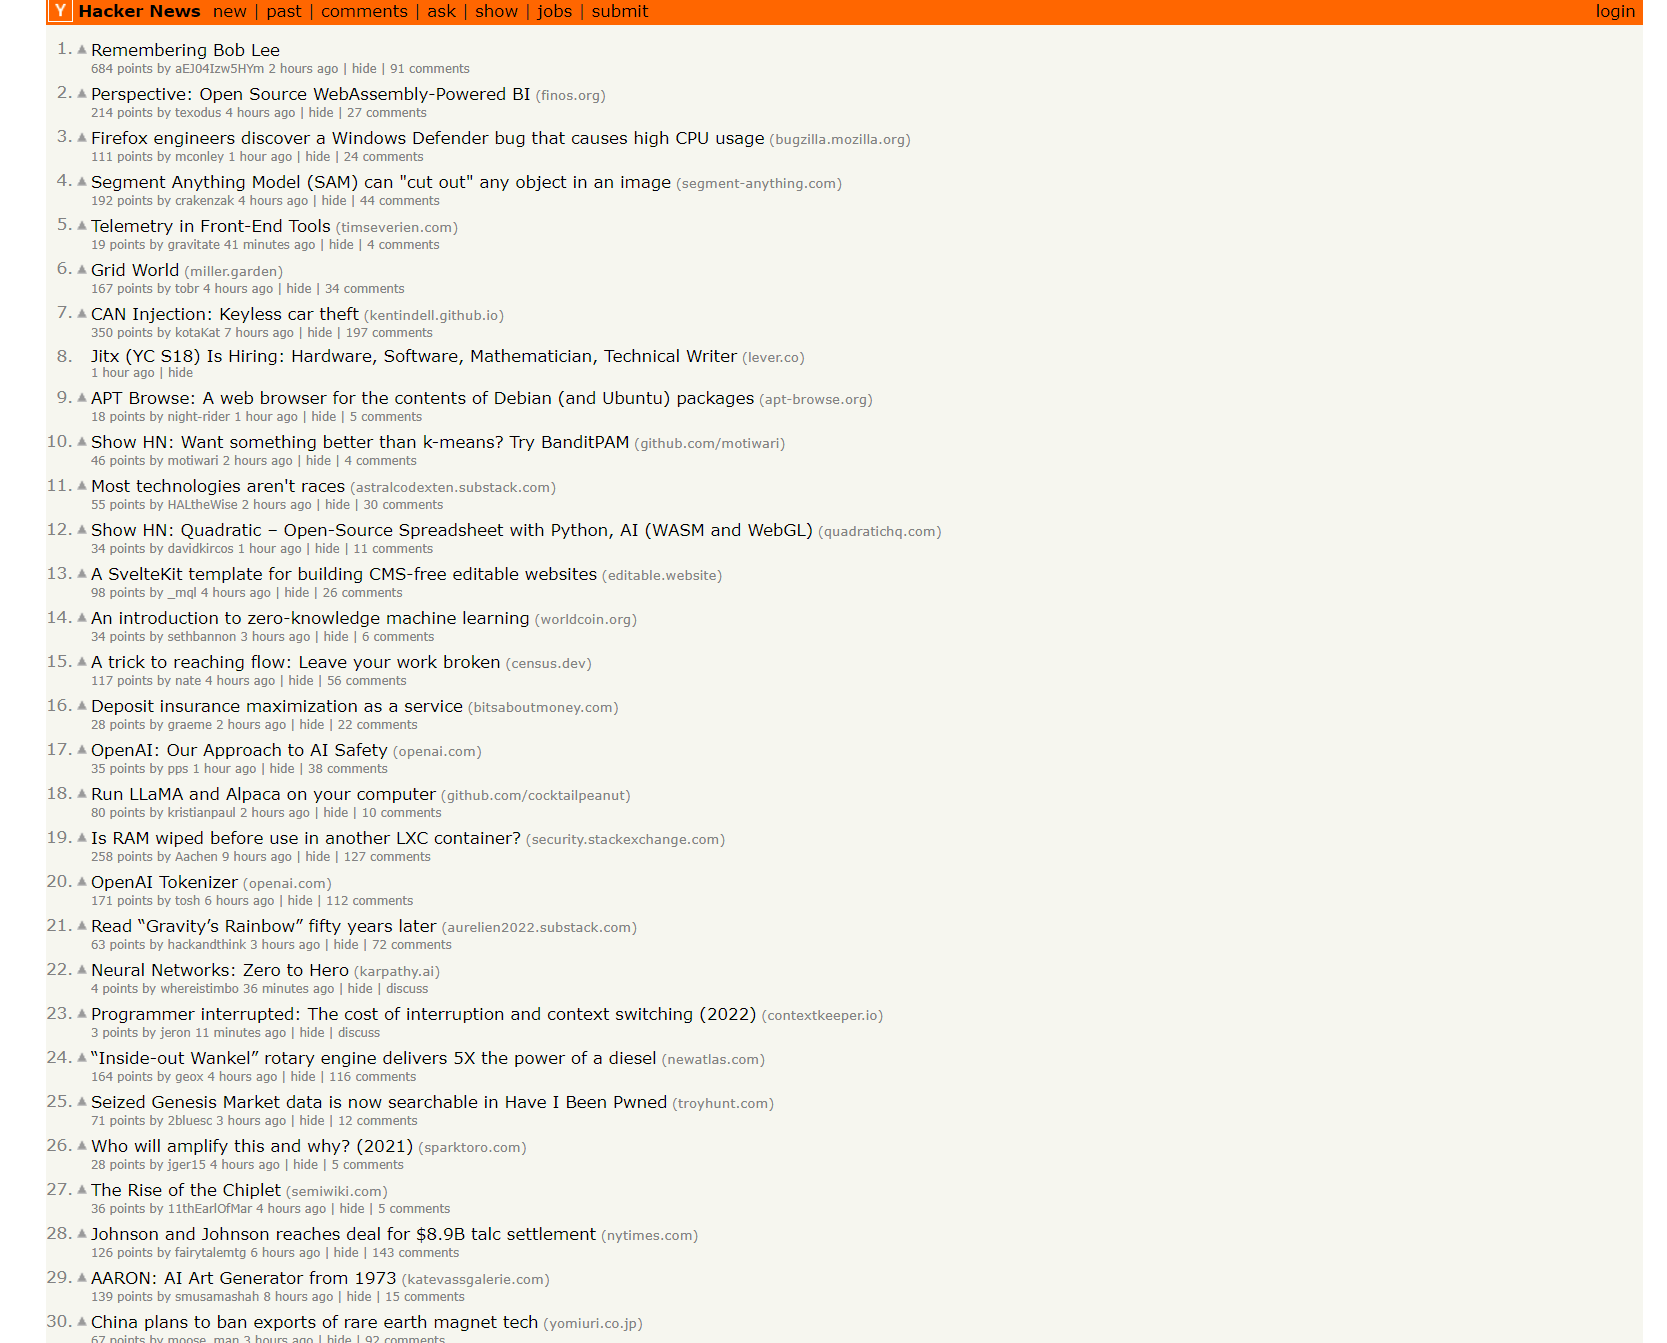

we are going to use Beautiful Soup and Requests to scrap the data

In [2]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://news.ycombinator.com/news')
#print(res.text)

soup = BeautifulSoup(res.text, 'html.parser')
print(soup.prettify)
links = soup.select('.titleline')
votes = soup.select('.score')


<bound method Tag.prettify of <html lang="en" op="news"><head><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><link href="news.css?toWS6aB2zfeX7t7XPOt7" rel="stylesheet" type="text/css"/>
<link href="favicon.ico" rel="shortcut icon"/>
<link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
<title>Hacker News</title></head><body><center><table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
<tr><td bgcolor="#000000"><img height="5" src="s.gif" width="0"/></td></tr>
<tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img height="18" src="y18.gif" style="border:1px white solid;" width="18"/></a></td>
<td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
<a href="newest"

In [4]:
#read more than one page
# sort the stories by votes
import requests
from bs4 import BeautifulSoup
import pprint

res = requests.get('https://news.ycombinator.com/news')
res2 = requests.get('https://news.ycombinator.com/news?p=2')
# print(res.text)
soup = BeautifulSoup(res.text, 'html.parser')
soup2 = BeautifulSoup(res2.text, 'html.parser')

links = soup.select('.titleline')
subtext = soup.select('.subtext')

links2 = soup2.select('.titleline')
subtext2 = soup2.select('.subtext')

mega_links = links + links2
mega_subtext = subtext + subtext2


def sort_stories_by_votes(hnlist):
    return sorted(hnlist, key=lambda k:k['votes'], reverse=True)

def create_custom_hn(links, subtext):
    hn = [] #create an empty list
    for idx, item in enumerate(links):
        for href in item:
            href = href.get('href', None)
            title = item.getText()
           # href = item.get('href', None) #so we satisfy empty title without href
            vote = subtext[idx].select('.score')
            if len(vote):
                points = int(vote[0].getText().replace(' points', ''))
                if points > 99:
                    hn.append({'title': title, 'link': href, 'votes': points}) #create a dictionary
    return sort_stories_by_votes(hn)

pprint.pprint(create_custom_hn(mega_links, mega_subtext))

[{'link': 'item?id=35457341', 'title': 'Remembering Bob Lee', 'votes': 698},
 {'link': 'https://course.fast.ai/Lessons/part2.html',
  'title': 'Deep Learning Foundations to Stable Diffusion (fast.ai)',
  'votes': 551},
 {'link': None,
  'title': 'Deep Learning Foundations to Stable Diffusion (fast.ai)',
  'votes': 551},
 {'link': 'https://kentindell.github.io/2023/04/03/can-injection/',
  'title': 'CAN Injection: Keyless car theft (kentindell.github.io)',
  'votes': 351},
 {'link': None,
  'title': 'CAN Injection: Keyless car theft (kentindell.github.io)',
  'votes': 351},
 {'link': 'https://boilingsteam.com/liberating-the-macbook-air-2013-with-linux-complete-guide/',
  'title': 'Liberating the MacBook Air 2013 with Linux (boilingsteam.com)',
  'votes': 315},
 {'link': None,
  'title': 'Liberating the MacBook Air 2013 with Linux (boilingsteam.com)',
  'votes': 315},
 {'link': 'https://security.stackexchange.com/questions/269507/is-ram-wiped-before-use-in-another-lxc-container',
  'titl

In [5]:
import pandas as pd
myData = create_custom_hn(mega_links, mega_subtext)
df = pd.DataFrame(myData)
df

,title,link,votes
0,Remembering Bob Lee,item?id=35457341,698
1,Deep Learning Foundations to Stable Diffusion ...,https://course.fast.ai/Lessons/part2.html,551
2,Deep Learning Foundations to Stable Diffusion ...,None,551
3,CAN Injection: Keyless car theft (kentindell.g...,https://kentindell.github.io/2023/04/03/can-in...,351
4,CAN Injection: Keyless car theft (kentindell.g...,None,351
5,Liberating the MacBook Air 2013 with Linux (bo...,https://boilingsteam.com/liberating-the-macboo...,315
6,Liberating the MacBook Air 2013 with Linux (bo...,None,315
7,Is RAM wiped before use in another LXC contain...,https://security.stackexchange.com/questions/2...,258
8,Is RAM wiped before use in another LXC contain...,None,258
9,Perspective: Open Source WebAssembly-Powered B...,https://perspective.finos.org/,217


In [6]:
df.head()

,title,link,votes
0,Remembering Bob Lee,item?id=35457341,698
1,Deep Learning Foundations to Stable Diffusion ...,https://course.fast.ai/Lessons/part2.html,551
2,Deep Learning Foundations to Stable Diffusion ...,None,551
3,CAN Injection: Keyless car theft (kentindell.g...,https://kentindell.github.io/2023/04/03/can-in...,351
4,CAN Injection: Keyless car theft (kentindell.g...,None,351


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   46 non-null     object
 1   link    24 non-null     object
 2   votes   46 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
